In [1]:
%matplotlib inline

# Tarea 5: Reducción de Dimensiones: caso de insuficiencia cardiaca 

Tecnológico de Costa Rica<br/>
Aprendizaje Automático <br/>


Cuaderno base para realizar la tarea 5 en la que se usará la reducción de dimensiones para visualizar la estructura de datos en espacios de muchas dimensiones.<br/>
<br/>
código reacondicionado por:  <br/>
Salomón Ramirez Quirós. <br/>
Carlos A. Barrantes Castro <br/>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Cargar datos de tejido canceroso

Los datos quedarán almacenados en X y las etiquetas en y

In [3]:
archivo_csv = 'cancer.csv' 

col_label = 1 ## Columna en el CSV con las etiquetas 'B'enigno o 'M'aligno
col_feats = 2 ## Columna en el CSV a partir de la cual se encuentran las características

horizontal=12  ## Tamaño de las figuras
figsize=(horizontal,horizontal/(16/9))

Cargar todos los datos en archivo csv

In [4]:
## Es necesario manejar manualmente la conversión del caracter en la 1era columna a número
converters={}
for i in range(32):
    converters[i] = lambda x : float(x)
converters[col_label] =  lambda x : 1.0 if (x==b'M') else 0.0

data = np.genfromtxt(archivo_csv, delimiter=',',skip_header=1,converters=converters)
print("Datos completos en matriz {0} x {1}".format(data.shape[0],data.shape[1]))

Datos completos en matriz 569 x 32


In [5]:
# La columna col_labels tiene las etiquetas
y=data[:,col_label].ravel()
print("Label shape:",y.shape)

# La columna col_grupos tiene los grupos
X=data[:,col_feats:32]
print("Data shape :",X.shape)


Label shape: (569,)
Data shape : (569, 30)


### Normalización de los datos

In [6]:
## Por hacer
from sklearn.preprocessing import StandardScaler
labels=['Benigno', 'Maligno']
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

### Métodos de reducción de dimensiones

- Métodos no supervisados
- Métodos superavisados
- PaCMAP

### PCA

Código utilizado de: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

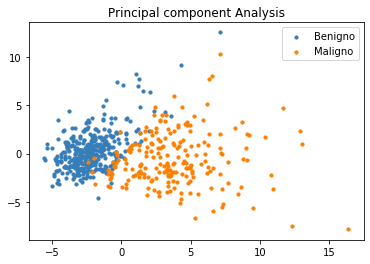

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

##Se plotean los datos
colors = ['#377eb8', '#ff7f00']
colors = np.array(colors)
for i in range(0,2):
    scatter = plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], s=10, color=colors[i], label=labels[i])
plt.legend();
plt.title( "Principal component Analysis" );

### FactorAnalysis:

Código utilizado de: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis

/home/carlos/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_factor_analysis.py:242: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


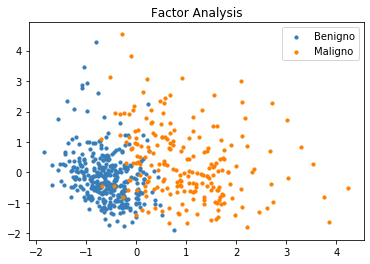

In [8]:
from sklearn.decomposition import FactorAnalysis

transformer = FactorAnalysis(n_components=2,max_iter=10)
X_FA = transformer.fit_transform(X)

##Se plotean los datos
colors = ['#377eb8', '#ff7f00']
colors = np.array(colors)

for i in range(0,2):
    scatter = plt.scatter(X_FA[y==i, 0], X_FA[y==i, 1], s=10, color=colors[i], label=labels[i])
plt.legend()
plt.title( "Factor Analysis" );

### FastICA:

Código utilizado de: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html#sklearn.decomposition.FastICA


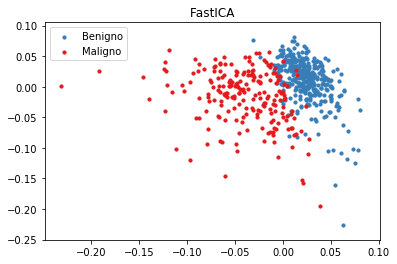

In [9]:
from sklearn.decomposition import FastICA

transformer = FastICA(n_components=2, random_state=0, whiten='unit-variance')
X_fica= transformer.fit_transform(X)

##Se plotean los datos
colors = ['#377eb8', '#e41a1c']
colors = np.array(colors)

for i in range(0,2):
    scatter = plt.scatter(X_fica[y==i, 0], X_fica[y==i, 1], s=10, color=colors[i], label=labels[i])
plt.legend();
plt.title( "FastICA" );

### Supervisado: Linear Discriminant Analysis

Código utilizado de: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

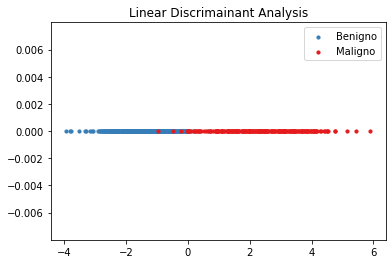

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
X_LDA = clf.fit_transform(X, y)

##Se plotean los datos
colors = ['#377eb8', '#e41a1c']
colors = np.array(colors)

for i in range(0,2):
    scatter = plt.scatter(X_LDA[y==i, 0], np.zeros(X_LDA[y==i, 0].shape), s=10, color=colors[i], label=labels[i])
plt.legend();
plt.title( "Linear Discrimainant Analysis" );


### PACMAP:



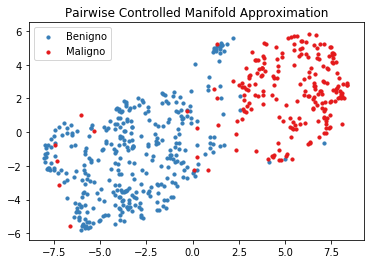

In [11]:
import pacmap

embedding = pacmap.PaCMAP(2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 
X_pm = embedding.fit_transform(X, init="pca")

for i in range(0,2):
    scatter = plt.scatter(X_pm[y==i, 0], X_pm[y==i, 1], s=10, color=colors[i], label=labels[i])
plt.legend();
plt.title( "Pairwise Controlled Manifold Approximation" );

### Aglomeración 

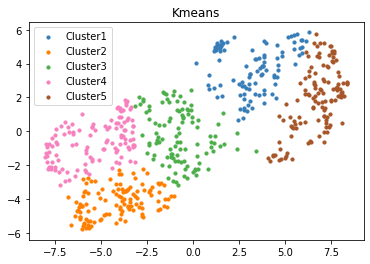

In [12]:
#Kmeans
from sklearn.cluster import KMeans

colors = np.array(['#377eb8', '#ff7f00', '#4daf4a',
                 '#f781bf', '#a65628', '#984ea3',
                 '#999999', '#e41a1c', '#dede00'])
numb=5
kmeans = KMeans(n_clusters=numb, random_state=0).fit(X_pm)
y_pred=kmeans.predict(X_pm)

for i in range(0,numb):
    lab='Cluster' + str(i+1)
    scatter = plt.scatter(X_pm[y_pred==i, 0], X_pm[y_pred==i, 1], s=10, color=colors[i], label=lab)
plt.legend();
plt.title( "Kmeans" );

### Clasificación con modelos generativos

Código utilizado de: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html


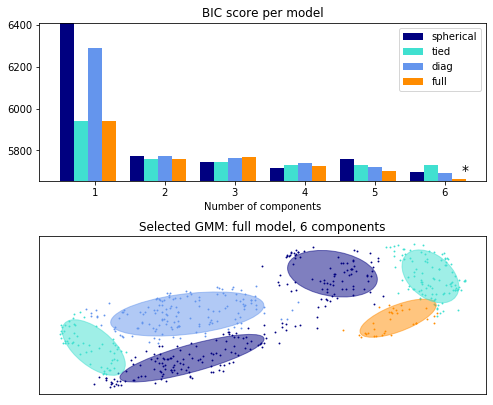

In [13]:
from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib as mpl


# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
#X = np.r_[
 #   np.dot(np.random.randn(n_samples, 2), C),
  #  0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
#]
X = X_pm

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()